In [1]:
!pip install --upgrade  pip
!pip install numpy
!pip install pandas 
!pip install scikit-learn
!pip install xgboost 
!pip install seaborn
!pip install matplotlib
!pip install scikit-optimize
!pip install hyperopt

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
  Using cached xgboost-1.7.4-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.8 MB)
  Using cached scikit_optimize-0.9.0-py2.py3-none-any.whl (100 kB)
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)


In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [7]:
train_ipad = pd.read_csv("dc_ipads.csv")
ss = pd.read_csv("dc_signal_strength.csv")
ap_loc = pd.read_csv("dc_ap_locations.csv")
test_ipad = pd.read_csv("dc_test_data.csv")
ipads_info = pd.read_csv("ipads.csv")

In [4]:
train_ipad.head()

,iPad Name,iPad ID,iPad x,iPad y,Floor
0,Big Sur,0452f3638d1a,3.0,49.2,3
1,Lake Shasta,0452f36388d5,10.0,40.8,3
2,Santa Beach,0452f3670522,20.3,40.8,3
3,Pismo Beach,0452f3640b3e,21.1,30.0,3
4,Malibu,0452f3696eed,24.0,40.8,3


In [5]:
ss.head()

,iPad ID,Access Point ID,Signal Strength
0,0452f3638d1a,b45d50f656d0,43
1,0452f3638d1a,b45d50f656d0,43
2,0452f3638d1a,b45d50f656d0,43
3,0452f3638d1a,b45d50f656d0,43
4,0452f3638d1a,b45d50f656d0,43


In [6]:
ap_loc.head()

,Access Point ID,Access Point x,Access Point y
0,b45d50f656d0,2.725522,43.234657
1,b45d50f65730,25.640387,42.366589
2,b45d50f64a90,25.388924,18.573597
3,b45d50f66510,48.534828,35.651848
4,b45d50f80750,39.702026,50.005184


In [8]:
test_ipad.head()

,iPad Name,iPad ID,Access Point ID,Signal Strength,Access Point x,Access Point y
0,Carmel,0452f360ef9f,b45d50f65110,19,20.025663,53.434486
1,Carmel,0452f360ef9f,b45d50f806d0,29,32.063740,53.824329
2,Carmel,0452f360ef9f,b45d50f81bb0,9,48.208385,55.907330
3,Joshua Tree,0452f36c3d9d,b45d50f64bd0,20,89.621559,29.453739
4,Joshua Tree,0452f36c3d9d,b45d50f64ed0,39,76.194511,29.509821


In [9]:
train_ipad['Floor'].value_counts()

3    17
Name: Floor, dtype: int64

In [10]:
all_ipads = train_ipad['iPad ID'].unique().tolist() + test_ipad['iPad ID'].unique().tolist()

In [12]:
all_ipads

['0452f3638d1a',
 '0452f36388d5',
 '0452f3670522',
 '0452f3640b3e',
 '0452f3696eed',
 '0452f3619976',
 'e8b2ac05843d',
 '0452f36b08f1',
 '0452f36b0de7',
 '0452f36d447c',
 '0452f36b0df9',
 '0452f36bdd3b',
 '0452f36c37d6',
 '0452f36b2e85',
 '0452f36b0e74',
 '0452f36d4491',
 '0452f36af6e6',
 '0452f360ef9f',
 '0452f36c3d9d',
 '0452f3641b87',
 '0452f36b0ded']

In [13]:
ipads_info.head()

,Unnamed: 0,Room_name,stamac,Serial Number,Last Inventory Update,iOS Version,x_on_floorplan_[m],y_on_floorplan_[m],floor_num
0,0,Mariner,e8b2ac04f168,DLXS832XHGJ1,3/21/18 13:36,11.2.2,87.0,46.0,0
1,1,Opportunity 1,e8b2ac029e9c,DLXS8352HGJ1,3/20/18 21:27,11.2.2,NaN,NaN,0
2,2,Opportunity 2,0452f36c759d,DLXS741PHGJ1,3/21/18 1:56,11.2.2,NaN,NaN,0
3,3,Voyager,e8b2ac04ee6c,DLXS82RQHGJ1,3/21/18 13:36,11.2.2,64.0,46.0,0
4,4,Pioneer,0452f36a626d,DLXS742GHGJ1,3/21/18 13:36,11.2.2,69.0,46.0,0


In [15]:
ipads_info.loc[ipads_info['stamac'].isin(test_ipad['iPad ID'].unique().tolist()),]

,Unnamed: 0,Room_name,stamac,Serial Number,Last Inventory Update,iOS Version,x_on_floorplan_[m],y_on_floorplan_[m],floor_num
58,58,Lake Tahoe,0452f3641b87,DLXS6HJ9HGJ1,3/20/18 22:46,11.2.1,17.8,31.0,3
65,65,Santa Cruz,0452f36b0ded,DLXS73ZGHGJ1,3/21/18 1:41,11.2.1,63.6,44.8,3
68,68,Joshua Tree,0452f36c3d9d,DLXS72WZHGJ1,3/21/18 0:36,11.2.1,78.1,28.7,3
73,73,Carmel,0452f360ef9f,DLXS6G8LHGJ1,3/21/18 13:36,11.2.1,36.5,48.0,3


In [16]:
test_ipad['iPad ID'].unique().tolist()

['0452f360ef9f', '0452f36c3d9d', '0452f3641b87', '0452f36b0ded']

In [17]:
ipad_ap = pd.merge(ss, train_ipad, how = 'left', on = 'iPad ID')

In [18]:
ipad_ap

,iPad ID,Access Point ID,Signal Strength,iPad Name,iPad x,iPad y,Floor
0,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3
1,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3
2,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3
3,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3
4,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3
...,...,...,...,...,...,...,...
20679,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3
20680,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3
20681,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3
20682,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3


In [19]:
ipad_ap_loc = pd.merge(ipad_ap, ap_loc, how = 'left', on = "Access Point ID")
ipad_ap_loc

,iPad ID,Access Point ID,Signal Strength,iPad Name,iPad x,iPad y,Floor,Access Point x,Access Point y
0,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657
1,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657
2,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657
3,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657
4,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657
...,...,...,...,...,...,...,...,...,...
20679,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479
20680,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479
20681,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479
20682,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479


In [28]:
ipad_ap_loc['Euc_dist'] = (ipad_ap_loc['iPad x'] - ipad_ap_loc['Access Point x'])**2 + (ipad_ap_loc['iPad y'] - ipad_ap_loc['Access Point y'])**2
ipad_ap_loc['Man_dist'] = abs(ipad_ap_loc['iPad x'] - ipad_ap_loc['Access Point x']) + abs(ipad_ap_loc['iPad y'] - ipad_ap_loc['Access Point y'])

In [29]:
ipad_ap_loc

,iPad ID,Access Point ID,Signal Strength,iPad Name,iPad x,iPad y,Floor,Access Point x,Access Point y,Euc_dist,Man_dist
0,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657,35.660652,6.239821
1,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657,35.660652,6.239821
2,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657,35.660652,6.239821
3,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657,35.660652,6.239821
4,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657,35.660652,6.239821
...,...,...,...,...,...,...,...,...,...,...,...
20679,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479,834.807771,33.992253
20680,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479,834.807771,33.992253
20681,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479,834.807771,33.992253
20682,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479,834.807771,33.992253


<AxesSubplot:>

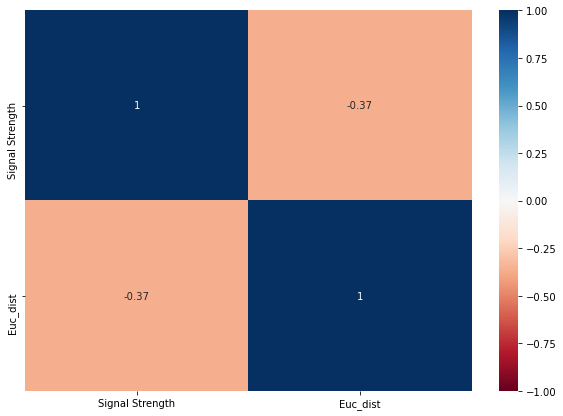

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(ipad_ap_loc[["Signal Strength", "Euc_dist"]].corr(), vmax=1, vmin=-1, cmap='RdBu', annot=True)

In [26]:
ipad_ap_loc[["Signal Strength", "Euc_dist"]].corr()

,Signal Strength,Euc_dist
Signal Strength,1.000000,-0.365388
Euc_dist,-0.365388,1.000000


In [30]:
ipad_ap_loc[["Signal Strength", "Man_dist"]].corr()

,Signal Strength,Man_dist
Signal Strength,1.000000,-0.464078
Man_dist,-0.464078,1.000000


In [42]:
model = LinearRegression()
x = ipad_ap_loc["Signal Strength"].to_numpy().reshape((-1, 1))
y = ipad_ap_loc['Man_dist'].to_numpy()
model.fit(x,y )
r = model.score(x, y)
print(f"coefficient of determination: {r}")

coefficient of determination: 0.21536882389389134


In [39]:
np.shape(ipad_ap_loc["Signal Strength"].to_numpy().reshape((-1, 1)))

(20684, 1)

In [43]:
y_pred = model.predict(x)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mean_absolute_error(y_pred, y)


10.276063558287385

In [50]:
mean_absolute_percentage_error(y_pred, y)

0.5663984019155615